## Theory Assignment
### Problem Statement: Create your own dataset of 10 rows of information(medical, student, inventory, store) apply all data preprocessing, data wrangling method. finally represent the data using suitable plots. Please make sure that everyone selects the unique dataset. Upload the python file, which consists description of every step, code, results

 #### Creating dataset by Scraping Amazon website for DSLR Camera with use of beautiful soup and visualising the data

##### Importing the libraries

In [9]:
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Creating csv file for storing the data

In [375]:
#creating csv file 
import csv
csv_file = open('amazon_dslr.csv','w',encoding='UTF8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Names','Price', 'Ratings','Reviews'])

29

##### Making a generalized function for scraping multiple pages with beautiful soup

In [377]:
def amazon_scrape(URL):
    ua = UserAgent()
    header = {'user-agent':ua.chrome}
    website = requests.get(URL,headers=header)

    #creating soup
    soup = BeautifulSoup(website.content,'lxml')

    #creating for loop to iterate over whole page
    for container in soup.find_all('div',class_="sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20"):
        try:
            #extracting the names of the camera
            titles = container.find('span',class_="a-size-medium a-color-base a-text-normal")
            titles = titles.string
        
            #extracting the prices
            prices = container.find('span',class_="a-price-whole").text
            prices = float(prices.replace(',',''))

            #extracting the ratings
            ratings = container.find('span',class_="a-icon-alt")
            ratings = ratings.text.split()[0]

            #extracting number of reviews
            reviews = container.find('span',class_="a-size-base")
            reviews = reviews.text.split()[0].replace(',','')
            reviews = float(reviews)
        
        #except will activate when some data is missing and should not interrupt the iterations 
        except:
            prices = np.nan
            ratings = np.nan
            reviews = np.nan
        #writing to the file    
        csv_writer.writerow([titles,prices,ratings,reviews]) 

In [380]:
#creating a list of URL's to iterate over 3 pages
URLs = ['https://www.amazon.in/s?k=dslr&i=electronics&crid=3SHCJJ8MLP95R&sprefix=dsl%2Celectronics%2C338&ref=nb_sb_noss','https://www.amazon.in/s?k=dslr&i=electronics&page=2&crid=3SHCJJ8MLP95R&qid=1643133655&sprefix=dsl%2Celectronics%2C338&ref=sr_pg_2','https://www.amazon.in/s?k=dslr&i=electronics&page=3&crid=3SHCJJ8MLP95R&qid=1643136674&sprefix=dsl%2Celectronics%2C338&ref=sr_pg_3']

#Calling the function with the collected URLs
for URL in URLs:
    amazon_scrape(URL)

In [381]:
#closing the csv file
csv_file.close()

#### Reading and Processing the Data

In [3]:
df = pd.read_csv('amazon_dslr.csv')
df

,Names,Price,Ratings,Reviews
0,Canon EOS 1500D 24.1 Digital SLR Camera (Black...,36999.0,4.4,9590.0
1,(Renewed) Canon EOS 1500D Digital SLR Camera (...,29800.0,3.7,53.0
2,Canon EOS 80D 24.2MP Digital SLR Camera (Black...,111990.0,4.4,1256.0
3,Nikon D7500 20.9MP Digital SLR Camera (Black) ...,94950.0,4.4,284.0
4,Canon EOS 3000D 18MP Digital SLR Camera (Black...,NaN,NaN,NaN
...,...,...,...,...
67,Canon EOS 5D Mark IV 30.4 MP Digital SLR Camer...,349485.0,4.5,104.0
68,Hanumex® 58MM Reversible Flower Lens Hood for ...,149.0,3.7,281.0
69,Fujifilm X-A7 24.2 MP Mirrorless Camera with X...,56999.0,4.1,74.0
70,SHOPEE 58mm Reversible Flower Lens Hood for Ca...,175.0,3.7,2978.0


In [5]:
#Checking for nan values in dataset
df.isna().sum()

Names      0
Price      7
Ratings    7
Reviews    7
dtype: int64

In [6]:
#Dropping the rows with any null values 
df = df.dropna(axis=0,how='any')
df

,Names,Price,Ratings,Reviews
0,Canon EOS 1500D 24.1 Digital SLR Camera (Black...,36999.0,4.4,9590.0
1,(Renewed) Canon EOS 1500D Digital SLR Camera (...,29800.0,3.7,53.0
2,Canon EOS 80D 24.2MP Digital SLR Camera (Black...,111990.0,4.4,1256.0
3,Nikon D7500 20.9MP Digital SLR Camera (Black) ...,94950.0,4.4,284.0
5,(Renewed) Canon EOS 3000D 18MP Digital SLR Cam...,25500.0,3.7,8.0
...,...,...,...,...
67,Canon EOS 5D Mark IV 30.4 MP Digital SLR Camer...,349485.0,4.5,104.0
68,Hanumex® 58MM Reversible Flower Lens Hood for ...,149.0,3.7,281.0
69,Fujifilm X-A7 24.2 MP Mirrorless Camera with X...,56999.0,4.1,74.0
70,SHOPEE 58mm Reversible Flower Lens Hood for Ca...,175.0,3.7,2978.0


In [8]:
#dropping any duplicates calues
df = df.drop_duplicates()
df.shape

(59, 4)

In [10]:
#converting each column in dataframe to numeric values
df['Price'] = pd.to_numeric(df['Price'])
df['Ratings'] = pd.to_numeric(df['Ratings'])
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [13]:
#Dropping the price which are less than 5k as it would include the accessories which we dont want 
df = df['Price'] = df['Price'].apply(lambda x: np.nan if x < 5000 else x)
df.dropna(axis = 0,how='any')

,Names,Price,Ratings,Reviews
0,Canon EOS 1500D 24.1 Digital SLR Camera (Black...,36999.0,4.4,9590.0
1,(Renewed) Canon EOS 1500D Digital SLR Camera (...,29800.0,3.7,53.0
2,Canon EOS 80D 24.2MP Digital SLR Camera (Black...,111990.0,4.4,1256.0
3,Nikon D7500 20.9MP Digital SLR Camera (Black) ...,94950.0,4.4,284.0
5,(Renewed) Canon EOS 3000D 18MP Digital SLR Cam...,25500.0,3.7,8.0
6,Canon EOS 200D II 24.1MP Digital SLR Camera + ...,56990.0,4.5,1073.0
7,Sony DSC W830 Cyber-Shot 20.1 MP Point and Sho...,11490.0,3.8,2486.0
8,Nikon D850 45.7MP Digital SLR Camera (Black) w...,276012.0,3.9,9.0
9,Canon EOS 5D Mark IV 30.4 MP Digital SLR Camer...,349485.0,4.5,104.0
10,Nikon D5600 with AF-P 18-55 mm + AF-P 70-300 m...,66749.0,4.5,1824.0


#### Visualizing the data

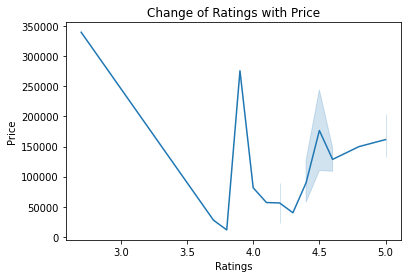

<Figure size 576x1080 with 0 Axes>

In [65]:
#plotting line graph of Ratings and Price
sns.lineplot(x=df['Ratings'],y=df['Price'])
plt.title("Change of Ratings with Price")
plt.figure(figsize = (8,15))
plt.show()

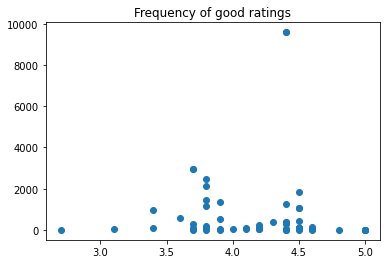

<Figure size 576x1080 with 0 Axes>

In [69]:
#plotting the ratings and price in simple plot
plt.scatter(df['Ratings'],df['Reviews'])
plt.title("Frequency of good ratings")
plt.figure(figsize = (8,15))
plt.show()

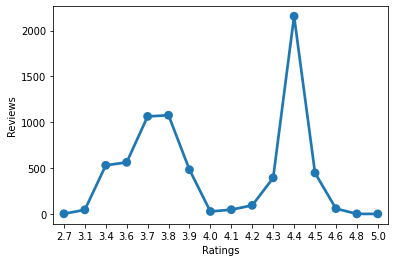

<Figure size 576x1080 with 0 Axes>

In [71]:
#plotting the price and reviews with point plot
sns.pointplot(x= df['Ratings'],y =df['Reviews'],ci =None)
plt.figure(figsize = (8,15))
plt.show()

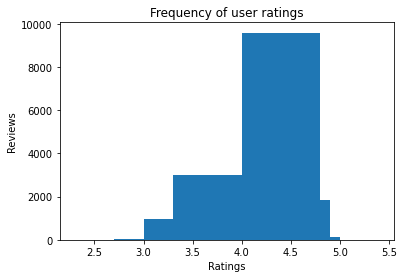

<Figure size 504x1080 with 0 Axes>

In [66]:
#plotting ratings and Reviews with bar graph
plt.bar(df['Ratings'],df['Reviews'])
plt.title("Frequency of user ratings")
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.figure(figsize = (7,15))
plt.show()

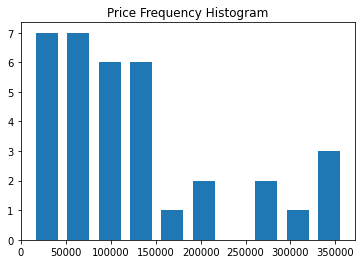

<Figure size 504x1080 with 0 Axes>

In [46]:
#plotting histogram of price
plt.hist(df.Price,rwidth = 0.7)
plt.title("Price Frequency Histogram")
plt.figure(figsize = (7,15))
plt.show()

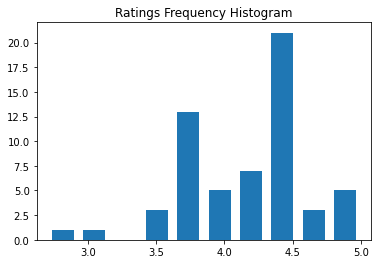

<Figure size 504x1080 with 0 Axes>

In [47]:
#plotting histogram of ratings 
plt.hist(df.Ratings,rwidth = 0.7)
plt.title("Ratings Frequency Histogram")
plt.figure(figsize = (7,15))
plt.show()

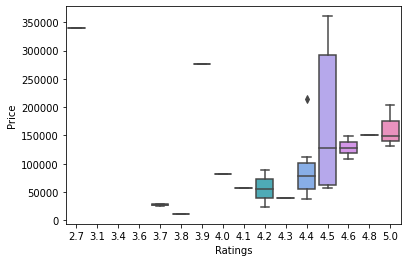

<Figure size 576x1080 with 0 Axes>

In [68]:
#using the boxplot to plot ratings and price
sns.boxplot(x= df['Ratings'],y =df['Price'])
plt.figure(figsize = (8,15))
plt.show()